<a href="https://colab.research.google.com/github/adamazanos/rvw_binar_app_andr_lstm/blob/main/Review_binar_app_android.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**REVIEW SENTIMENT ANALYSIS BINAR**

08 JANUARI 2023

APPS ANDROID BINAR ACADEMY = https://play.google.com/store/apps/details?id=com.binaracademy.app&hl=id&gl=US

MENGGUNAKAN MODEL DARI NUSAX


TAHAPAN TAHAPAN

1.   SCRAPPING REVIEW DI GOOGLE PLAY
2.   REVIEW HASIL SCRAPING
3.   PERSIAPAN DATASET DARI NUSA X
    1.  READ DATA MENTAH
    2.  KOMBINASI DATASET INGGRIS & INDO  
4.  PERSIAPAN MODELING DATA TRAIN
    1.  FEATURE EXTRACTION
5.   PENERAPAN RNN

# 1. SCRAPING REVIEW BINAR ACADEMY APPS
Download data informasi yang terutama review dan nilai score

In [47]:
pip install google_play_scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [49]:
from google_play_scraper import Sort, reviews_all


ind_reviews = reviews_all(
    'com.binaracademy.app',
    sleep_milliseconds=0, # defaults to 0
    lang='ind', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)


In [50]:
print (ind_reviews)

[{'reviewId': '0b5cceaf-a57c-4123-9a96-c6721938d9f5', 'userName': "Mar'iy muslih", 'userImage': 'https://play-lh.googleusercontent.com/a-/AD5-WCn4WIyEmkAuDo5TpHbaEkNozfUE3KKfeQCG7Jqs7g', 'content': 'Unsatisfied apps and program.', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': '6.2.1', 'at': datetime.datetime(2022, 12, 22, 1, 25, 38), 'replyContent': "Hai Kak Mar'iy, thank you for your feedback and we are deeply sorry for the inconvenience. Can you please share the problem with us in more detail so that we can improve our app. Please contact us through DM Instagram @academybinar.", 'repliedAt': datetime.datetime(2022, 12, 23, 2, 26, 38)}, {'reviewId': 'ffe9afce-c90f-4c7c-a7b1-73172075c459', 'userName': 'Arga Dinata', 'userImage': 'https://play-lh.googleusercontent.com/a/AEdFTp4I5unGQJf3colw4g9AwSeXDM-p04h-RxuC4OoK=mo', 'content': 'Beli Binar Go, pembayaran sudah terdebet dari kartu kredit, tapi status masih pending. Sudah chat via WA menunggu 24 jam tidak ada respon.', 'score'

In [51]:
df_binaracademy = pd.DataFrame(np.array(ind_reviews),columns=['review'])
df_binaracademy = df_binaracademy.join(pd.DataFrame(df_binaracademy.pop('review').tolist()))
df_binaracademy.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0b5cceaf-a57c-4123-9a96-c6721938d9f5,Mar'iy muslih,https://play-lh.googleusercontent.com/a-/AD5-W...,Unsatisfied apps and program.,1,0,6.2.1,2022-12-22 01:25:38,"Hai Kak Mar'iy, thank you for your feedback an...",2022-12-23 02:26:38
1,ffe9afce-c90f-4c7c-a7b1-73172075c459,Arga Dinata,https://play-lh.googleusercontent.com/a/AEdFTp...,"Beli Binar Go, pembayaran sudah terdebet dari ...",1,0,6.2.0,2022-12-10 13:02:02,"Hai Kak Arga Dinata, Thank you for your feedba...",2022-12-11 02:26:17
2,a8a2ff19-581f-42a4-be97-c32d0202f7c7,Ara Wibowo,https://play-lh.googleusercontent.com/a-/AD5-W...,Specifically this review is for BinarGO. Overa...,3,0,6.2.0,2022-12-06 04:59:42,"Hai Kak Ara Wibowo, Thank you for your feedbac...",2022-12-10 08:18:44
3,6d450673-4617-4626-b103-3749a755ce6e,Rory Mercury,https://play-lh.googleusercontent.com/a/AEdFTp...,Yes its good app i like to lern more about dig...,5,0,6.1.1,2022-11-16 05:09:28,"Hai Kak Roy Mercury, terima kasih sudah berkon...",2022-11-17 02:56:37
4,06aa2052-8cc8-4118-a954-cefe9c35b17e,Nadia Dwiariani,https://play-lh.googleusercontent.com/a/AEdFTp...,Can't login,2,0,6.0.0,2022-11-08 07:39:56,We apologize for the inconvenience. Can you be...,2022-11-11 03:15:56
5,a31ea2f2-5e2d-4d18-bb7d-a846b901498c,Ardelia Novalista Amanda Trouerbach,https://play-lh.googleusercontent.com/a-/AD5-W...,Mohon diperbaiki lagi.. UI sudah bagus tetapi ...,3,0,6.0.0,2022-11-06 03:47:53,"Hai Kak Ardelia Novalista Amanda, Thank you fo...",2022-11-06 08:30:25
6,f810320b-89a4-4482-bc02-ed2581ac4168,M Umar Al Fajar,https://play-lh.googleusercontent.com/a-/AD5-W...,"1 star: can't register with google, long buffe...",3,0,6.0.0,2022-10-29 01:59:43,"Hai Kak, Thank you for your feedback and we ar...",2022-10-29 04:16:14
7,40dfdc72-c20e-410f-994d-da6869c8333d,fn Kamal,https://play-lh.googleusercontent.com/a-/AD5-W...,Apakah update ini di QA dlu? Saya belajar QA d...,1,0,6.0.0,2022-10-24 00:19:48,"Halo Kak Fachry, terima kasih untuk feedbackny...",2022-08-22 05:02:54
8,d241089e-6a33-4781-8e10-386b1f87c9f1,Junaidy,https://play-lh.googleusercontent.com/a-/AD5-W...,"After updating to version 6.0.0, suddenly the ...",2,0,6.0.0,2022-10-22 05:42:08,"Hai Kak, terima kasih untuk feedbacknya dan mo...",2022-10-24 07:33:21
9,0bfcfd00-1db2-4ed3-8dc2-b4ab2c99c53b,Riki Oktavian,https://play-lh.googleusercontent.com/a-/AD5-W...,Login aja susah gak bisa bisa,1,0,6.0.0,2022-10-21 15:43:31,"Hai Kak, Thank you for your feedback and we ar...",2022-10-22 07:43:44


In [52]:
df_binaracademy.tail(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
402,3942cccc-b548-4214-ac71-da35032704bb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Mantap jiwa appnya,5,1,3.0.0,2020-02-21 07:50:29,"Hai Kak, terima kasih sudah berkontribusi memb...",2022-08-03 04:36:28
403,544fe167-7194-4200-9b50-92b2cb34c27c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi yg sangat bgs.. materiny sangat mudah...,5,1,3.0.0,2020-02-20 23:00:28,"Hai Kak, terima kasih sudah berkontribusi memb...",2022-08-03 04:36:41
404,176820b3-36a2-48d1-bb21-250987a11fe2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Materi nya jelas dan mudah untuk d mengerti.,5,1,3.0.0,2020-02-20 09:46:08,"Hai Kak, terima kasih sudah berkontribusi memb...",2022-08-03 04:36:48
405,dda39fea-670b-437c-966e-b7fb322a1ad8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"App yang sangat menarik, content bagus mudah u...",5,1,3.0.0,2020-02-20 07:50:13,"Hai Kak, terima kasih sudah berkontribusi memb...",2022-08-03 04:36:53
406,dc0ddfd5-1615-4c32-be02-0a91a5dfddff,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,saya menghargai usaha teman saya yang buat app...,5,1,3.0.0,2020-02-20 07:31:27,"Hai Kak, terima kasih sudah berkontribusi memb...",2022-08-03 04:36:58
407,5531dae8-1293-4559-814b-899b7a0ec3f6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Awesome! Can't wait for the release of the oth...,5,6,None,2020-02-20 03:08:21,"Hai Kak, terima kasih sudah berkontribusi memb...",2022-08-03 04:37:04
408,e2c3ca8b-3faa-4599-92f6-797cd4075283,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Awesome apps for learning programming tips,5,4,None,2020-02-20 00:38:53,"Hai Kak, terima kasih sudah berkontribusi memb...",2022-08-03 04:37:33
409,7dc9f12b-5cdd-467f-88b4-29dc32cd27bc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Mangstap kak!!,5,0,3.0.0,2020-02-19 06:41:33,"Hai Kak, terima kasih sudah berkontribusi memb...",2022-08-03 04:37:12
410,db18d426-670a-4b93-86e5-ad290badb61e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,saya menghargai usaha teman saya yang buat app...,5,1,None,2020-02-19 03:15:48,"Hai Kak, terima kasih sudah berkontribusi memb...",2022-08-03 04:37:17
411,2c5272fe-26eb-43b0-a86b-060acd5ef50f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,saya menghargai usaha teman saya yang buat app...,5,2,3.0.0,2020-02-19 03:15:16,"Hai Kak, terima kasih sudah berkontribusi memb...",2022-08-03 04:37:23


In [53]:
df_binaracademy.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0b5cceaf-a57c-4123-9a96-c6721938d9f5,Mar'iy muslih,https://play-lh.googleusercontent.com/a-/AD5-W...,Unsatisfied apps and program.,1,0,6.2.1,2022-12-22 01:25:38,"Hai Kak Mar'iy, thank you for your feedback an...",2022-12-23 02:26:38
1,ffe9afce-c90f-4c7c-a7b1-73172075c459,Arga Dinata,https://play-lh.googleusercontent.com/a/AEdFTp...,"Beli Binar Go, pembayaran sudah terdebet dari ...",1,0,6.2.0,2022-12-10 13:02:02,"Hai Kak Arga Dinata, Thank you for your feedba...",2022-12-11 02:26:17
2,a8a2ff19-581f-42a4-be97-c32d0202f7c7,Ara Wibowo,https://play-lh.googleusercontent.com/a-/AD5-W...,Specifically this review is for BinarGO. Overa...,3,0,6.2.0,2022-12-06 04:59:42,"Hai Kak Ara Wibowo, Thank you for your feedbac...",2022-12-10 08:18:44
3,6d450673-4617-4626-b103-3749a755ce6e,Rory Mercury,https://play-lh.googleusercontent.com/a/AEdFTp...,Yes its good app i like to lern more about dig...,5,0,6.1.1,2022-11-16 05:09:28,"Hai Kak Roy Mercury, terima kasih sudah berkon...",2022-11-17 02:56:37
4,06aa2052-8cc8-4118-a954-cefe9c35b17e,Nadia Dwiariani,https://play-lh.googleusercontent.com/a/AEdFTp...,Can't login,2,0,6.0.0,2022-11-08 07:39:56,We apologize for the inconvenience. Can you be...,2022-11-11 03:15:56
5,a31ea2f2-5e2d-4d18-bb7d-a846b901498c,Ardelia Novalista Amanda Trouerbach,https://play-lh.googleusercontent.com/a-/AD5-W...,Mohon diperbaiki lagi.. UI sudah bagus tetapi ...,3,0,6.0.0,2022-11-06 03:47:53,"Hai Kak Ardelia Novalista Amanda, Thank you fo...",2022-11-06 08:30:25
6,f810320b-89a4-4482-bc02-ed2581ac4168,M Umar Al Fajar,https://play-lh.googleusercontent.com/a-/AD5-W...,"1 star: can't register with google, long buffe...",3,0,6.0.0,2022-10-29 01:59:43,"Hai Kak, Thank you for your feedback and we ar...",2022-10-29 04:16:14
7,40dfdc72-c20e-410f-994d-da6869c8333d,fn Kamal,https://play-lh.googleusercontent.com/a-/AD5-W...,Apakah update ini di QA dlu? Saya belajar QA d...,1,0,6.0.0,2022-10-24 00:19:48,"Halo Kak Fachry, terima kasih untuk feedbackny...",2022-08-22 05:02:54
8,d241089e-6a33-4781-8e10-386b1f87c9f1,Junaidy,https://play-lh.googleusercontent.com/a-/AD5-W...,"After updating to version 6.0.0, suddenly the ...",2,0,6.0.0,2022-10-22 05:42:08,"Hai Kak, terima kasih untuk feedbacknya dan mo...",2022-10-24 07:33:21
9,0bfcfd00-1db2-4ed3-8dc2-b4ab2c99c53b,Riki Oktavian,https://play-lh.googleusercontent.com/a-/AD5-W...,Login aja susah gak bisa bisa,1,0,6.0.0,2022-10-21 15:43:31,"Hai Kak, Thank you for your feedback and we ar...",2022-10-22 07:43:44


In [54]:
df_binaracademy.to_csv('binaracademy_rev_2022.csv', index=False)

In [55]:
df = pd.read_csv('binaracademy_rev_2022.csv')

In [56]:
df.dtypes

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
dtype: object

In [57]:
data_review = df.drop(["reviewId" , "score",	"userName" ,	"userImage" , "thumbsUpCount" , "at" ,	"replyContent" ,	"repliedAt", "reviewCreatedVersion"  ], axis= 1)

# 2. REVIEW HASIL SCRAPING

In [58]:
data_review

,content
0,Unsatisfied apps and program.
1,"Beli Binar Go, pembayaran sudah terdebet dari ..."
2,Specifically this review is for BinarGO. Overa...
3,Yes its good app i like to lern more about dig...
4,Can't login
...,...
407,Awesome! Can't wait for the release of the oth...
408,Awesome apps for learning programming tips
409,Mangstap kak!!
410,saya menghargai usaha teman saya yang buat app...


In [59]:
data_review.to_csv("scraping_review.csv")

# 3. PERSIAPAN DATASET DARI NUSA X

persiapkan dan gunakan data dari project NUSAX 

nb. karena ditemukan campuran penggunaan bahas indonesia dan bahasa inggris maka kita gunakan kedua data set inggris dan indonesia

english = https://github.com/IndoNLP/nusax/tree/main/datasets/sentiment/english

indonesia = https://github.com/IndoNLP/nusax/tree/main/datasets/sentiment/indonesian

In [60]:
import pandas as pd
from nltk import word_tokenize
import nltk
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from scipy.sparse import vstack
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Kita coba atur data bahasa indonesia agar bisa di read melalui collab

tujuannya bisa membaca data train, data validasi, dan data test

## 1. READ DATA MENTAH

In [61]:
#read data indo
df_train_id = pd.read_csv(r"https://raw.githubusercontent.com/IndoNLP/nusax/main/datasets/sentiment/indonesian/train.csv", encoding='latin=1')
df_valid_id = pd.read_csv(r"https://raw.githubusercontent.com/IndoNLP/nusax/main/datasets/sentiment/indonesian/valid.csv", encoding='latin=1')
df_test_id  = pd.read_csv(r"https://raw.githubusercontent.com/IndoNLP/nusax/main/datasets/sentiment/indonesian/test.csv", encoding='latin=1')


In [62]:
df_train_id

,id,text,label
0,219,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral
1,209,Kue-kue yang disajikan bikin saya bernostalgia...,positive
2,436,Ibu pernah bekerja di grab indonesia,neutral
3,394,Paling suka banget makan siang di sini ayam sa...,positive
4,592,Pelayanan bus DAMRI sangat baik,positive
...,...,...,...
495,589,Si A omongnya tong kosong nyaring bunyinya bic...,negative
496,636,Sambalnya tidak akan ada di tempat lain. Rasa ...,positive
497,710,"Menurut saya steaknya cukup enak, hanya lebih ...",positive
498,250,Dijaga ya makannya gus emang lagi musimnya sek...,negative


In [63]:
df_valid_id

,id,text,label
0,237,Jika ada pertanyaan lebih lanjut yang ingin ka...,neutral
1,101,Rasanya sih kok harga kaki lima dan rasanya ya...,negative
2,556,"Minimal cek pesan saya, ada problem yang rumit...",neutral
3,474,Dulu restoran ini merupakan favorit saya karen...,negative
4,42,Merupakan resto vintage dengan harga yang cuku...,positive
...,...,...,...
95,335,Mohon informasikan atm mana saja di semarang y...,neutral
96,921,Teman merekomendasikan tempat ini karena rasa ...,positive
97,147,"Pertama ke sini saya under estimate, pas waktu...",positive
98,678,Tempatnya menyenangkan baik untuk yang sudah b...,positive


In [64]:
df_test_id

,id,text,label
0,411,"Dekat dengan hotel saya menginap, hanya ditemp...",positive
1,729,"Iya benar, dia sedang jaga warung.",neutral
2,373,Kangkungnya lumayan tapi kepiting saus padangn...,negative
3,262,Bertempat di braga city walk yang satu gedung ...,positive
4,177,Gianyar terima bantuan sosial 2018 sebesar rp ...,neutral
...,...,...,...
395,502,Saya sudah sering kali datang menikmati makana...,positive
396,268,Banyak orang yang kurang suka untuk berobat ke...,negative
397,282,"Pelayanan baik, tempat parkir cukup luas, kebu...",positive
398,407,"Demi apa pun tes cpns bikin macet, sialannnnnnn",negative


Setelah berhasil kita gunakan yang bahasa inggris

In [65]:
#read data indo
df_train_eng = pd.read_csv(r"https://raw.githubusercontent.com/IndoNLP/nusax/main/datasets/sentiment/english/train.csv", encoding='latin=1')
df_valid_eng = pd.read_csv(r"https://raw.githubusercontent.com/IndoNLP/nusax/main/datasets/sentiment/english/valid.csv", encoding='latin=1')
df_test_eng  = pd.read_csv(r"https://raw.githubusercontent.com/IndoNLP/nusax/main/datasets/sentiment/english/test.csv", encoding='latin=1')


In [66]:
df_train_eng

,id,text,label
0,219,Enjoy 0% instalment for up to 12 months when o...,neutral
1,209,The cakes give me massive nostalgia. Everythin...,positive
2,436,Mom once worked for grab indonesia.,neutral
3,394,"I love having lunch here the most, thanks to t...",positive
4,592,The DAMRI Bus service is really good,positive
...,...,...,...
495,589,A talks like empty vessels that make the most ...,negative
496,636,You won't find this sambal anywhere else. The ...,positive
497,710,"I think the steak was quite good, my advice is...",positive
498,250,"Watch what you eat, Gus, it's that kind of sea...",negative


In [67]:
df_valid_eng

,id,text,label
0,237,If you have further questions you'd like to as...,neutral
1,101,I wondered why the cost is pedestrian and well...,negative
2,556,"At least check my message, there's a complicat...",neutral
3,474,This restaurant used to be my favorite because...,negative
4,42,It's a vintage resto with a pretty affordable ...,positive
...,...,...,...
95,335,Please inform which ATM in Semarang can be use...,neutral
96,921,My friend recommended this place because of it...,positive
97,147,"The first time coming here, I understimated th...",positive
98,678,The venue's fun both for people with families ...,positive


In [68]:
df_test_eng

,id,text,label
0,411,"Near the hotel I stayed in, reachable by foor,...",positive
1,729,"Yeah that's right, he's looking after the stor...",neutral
2,373,The water spinach was alright but the crab wit...,negative
3,262,"Located inside the Braga City Walk, which is i...",positive
4,177,"Gianyar recieved a total 44,9 billion Rupiah f...",neutral
...,...,...,...
395,502,I've been coming to enjoy the food in Roemah N...,positive
396,268,A lot of people don't really like going to the...,negative
397,282,"Good service, large enough parking lot, the st...",positive
398,407,"For crying out loud, CPNS test caused traffic,...",negative


## 2. KOMBINASI DATA SET ID DAN ENG
File gabungan 2 data train inggris dan indonesia lalu kota beri nama df_train
File gabungan 2 data validator inggris dan indonesia lalu kota beri nama df_valid

In [69]:
df_train_id_eng = pd.concat([df_train_id, df_test_eng], ignore_index=True, sort=False)
df_valid_id_eng = pd.concat([df_valid_id, df_valid_eng], ignore_index=True, sort=False)
df_test_id_eng = pd.concat([df_test_id, df_test_eng], ignore_index=True, sort=False)

In [70]:
df_train_id_eng

,id,text,label
0,219,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral
1,209,Kue-kue yang disajikan bikin saya bernostalgia...,positive
2,436,Ibu pernah bekerja di grab indonesia,neutral
3,394,Paling suka banget makan siang di sini ayam sa...,positive
4,592,Pelayanan bus DAMRI sangat baik,positive
...,...,...,...
895,502,I've been coming to enjoy the food in Roemah N...,positive
896,268,A lot of people don't really like going to the...,negative
897,282,"Good service, large enough parking lot, the st...",positive
898,407,"For crying out loud, CPNS test caused traffic,...",negative


In [71]:
df_train = df_train_id_eng.drop(["id"], axis= 1)
df_train

,text,label
0,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral
1,Kue-kue yang disajikan bikin saya bernostalgia...,positive
2,Ibu pernah bekerja di grab indonesia,neutral
3,Paling suka banget makan siang di sini ayam sa...,positive
4,Pelayanan bus DAMRI sangat baik,positive
...,...,...
895,I've been coming to enjoy the food in Roemah N...,positive
896,A lot of people don't really like going to the...,negative
897,"Good service, large enough parking lot, the st...",positive
898,"For crying out loud, CPNS test caused traffic,...",negative


In [72]:
df_valid = df_valid_id_eng.drop(["id"], axis= 1)
df_valid

,text,label
0,Jika ada pertanyaan lebih lanjut yang ingin ka...,neutral
1,Rasanya sih kok harga kaki lima dan rasanya ya...,negative
2,"Minimal cek pesan saya, ada problem yang rumit...",neutral
3,Dulu restoran ini merupakan favorit saya karen...,negative
4,Merupakan resto vintage dengan harga yang cuku...,positive
...,...,...
195,Please inform which ATM in Semarang can be use...,neutral
196,My friend recommended this place because of it...,positive
197,"The first time coming here, I understimated th...",positive
198,The venue's fun both for people with families ...,positive


In [73]:
df_test_id_eng

,id,text,label
0,411,"Dekat dengan hotel saya menginap, hanya ditemp...",positive
1,729,"Iya benar, dia sedang jaga warung.",neutral
2,373,Kangkungnya lumayan tapi kepiting saus padangn...,negative
3,262,Bertempat di braga city walk yang satu gedung ...,positive
4,177,Gianyar terima bantuan sosial 2018 sebesar rp ...,neutral
...,...,...,...
795,502,I've been coming to enjoy the food in Roemah N...,positive
796,268,A lot of people don't really like going to the...,negative
797,282,"Good service, large enough parking lot, the st...",positive
798,407,"For crying out loud, CPNS test caused traffic,...",negative


In [74]:
df_test = df_test_id_eng.drop(["id"], axis= 1)
df_test

,text,label
0,"Dekat dengan hotel saya menginap, hanya ditemp...",positive
1,"Iya benar, dia sedang jaga warung.",neutral
2,Kangkungnya lumayan tapi kepiting saus padangn...,negative
3,Bertempat di braga city walk yang satu gedung ...,positive
4,Gianyar terima bantuan sosial 2018 sebesar rp ...,neutral
...,...,...
795,I've been coming to enjoy the food in Roemah N...,positive
796,A lot of people don't really like going to the...,negative
797,"Good service, large enough parking lot, the st...",positive
798,"For crying out loud, CPNS test caused traffic,...",negative


Kita sortir berdasarkan sentimen POSITIVE NEGATIVE dan NEUTRAL


In [75]:
df_test.to_csv("test.csv")
df_train.to_csv("train.csv")
df_valid.to_csv("valid.csv")

Kita cek isi data set

In [76]:
df_test = pd.read_csv("/content/test.csv")

In [77]:
df_train = pd.read_csv("/content/train.csv")

In [78]:
df_valid = pd.read_csv("/content/valid.csv")

In [79]:
df_test

,Unnamed: 0,text,label
0,0,"Dekat dengan hotel saya menginap, hanya ditemp...",positive
1,1,"Iya benar, dia sedang jaga warung.",neutral
2,2,Kangkungnya lumayan tapi kepiting saus padangn...,negative
3,3,Bertempat di braga city walk yang satu gedung ...,positive
4,4,Gianyar terima bantuan sosial 2018 sebesar rp ...,neutral
...,...,...,...
795,795,I've been coming to enjoy the food in Roemah N...,positive
796,796,A lot of people don't really like going to the...,negative
797,797,"Good service, large enough parking lot, the st...",positive
798,798,"For crying out loud, CPNS test caused traffic,...",negative


In [80]:
df_train

,Unnamed: 0,text,label
0,0,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral
1,1,Kue-kue yang disajikan bikin saya bernostalgia...,positive
2,2,Ibu pernah bekerja di grab indonesia,neutral
3,3,Paling suka banget makan siang di sini ayam sa...,positive
4,4,Pelayanan bus DAMRI sangat baik,positive
...,...,...,...
895,895,I've been coming to enjoy the food in Roemah N...,positive
896,896,A lot of people don't really like going to the...,negative
897,897,"Good service, large enough parking lot, the st...",positive
898,898,"For crying out loud, CPNS test caused traffic,...",negative


In [81]:
df_valid

,Unnamed: 0,text,label
0,0,Jika ada pertanyaan lebih lanjut yang ingin ka...,neutral
1,1,Rasanya sih kok harga kaki lima dan rasanya ya...,negative
2,2,"Minimal cek pesan saya, ada problem yang rumit...",neutral
3,3,Dulu restoran ini merupakan favorit saya karen...,negative
4,4,Merupakan resto vintage dengan harga yang cuku...,positive
...,...,...,...
195,195,Please inform which ATM in Semarang can be use...,neutral
196,196,My friend recommended this place because of it...,positive
197,197,"The first time coming here, I understimated th...",positive
198,198,The venue's fun both for people with families ...,positive


In [135]:
neg = df_train.loc[df_train['label'] == 'negative', 'text'].values.tolist()
neu = df_train.loc[df_train['label'] == 'neutral', 'text'].values.tolist()
pos = df_train.loc[df_train['label'] == 'positive', 'text'].values.tolist()

neg_label = df_train.loc[df_train['label'] == 'negative', 'label'].values.tolist()
neu_label = df_train.loc[df_train['label'] == 'neutral', 'label'].values.tolist()
pos_label = df_train.loc[df_train['label'] == 'positive', 'label'].values.tolist()

In [112]:
neg

['Barangnya lumayan, cuma yang saya heran xiaomi redmi note 2 ini tombol onnya memang agak rusak? Terus baterai memang cepat low bat juragan?',
 'Sulit sekali mempercayai orang yang sudah pernah berkhianat',
 'Nasi goreng thailand di harga 35 ribu, polos, hanya ada suir ayam sedikit. Seafoodnya tidak ada.',
 'Seperti yang kita tahu, brownies yang asli dari amerika adalah kue bantat yang memang berwarna cokelat. Toko amanda mengkreasikan brownies dengan memasaknya secara mengukus. Brownies kukus ini sama sekali nggak banget. Teksturnya malah sama dengan bolu biasa. Jadi menurut saya, ini bukan brownies.',
 'Saya datang untuk makan malam bersama keluarga. Ini pertama kali saya ke sini. Kondisi tidak terlalu ramai. Untuk interior, agak kotor menurut saya. Adanya remah-remah bekas makanan di lantai dan meja, sepertinya tidak dibersihkan secara sempurna. Untuk rasa makanan, standar, tidak terlalu istimewa.',
 'Jangan pernah pesan melalui layanan ini ya teman-teman. Mengecewakan! Villa -nya 

In [114]:
neu

['Nikmati cicilan 0% hingga 12 bulan untuk pemesanan tiket pesawat air asia dengan kartu kredit bni!',
 'Ibu pernah bekerja di grab indonesia',
 'Mau bikin postingan yang isinya mengedukasi customers gojek.',
 'Ratusan rumah di medan terendam banjir',
 'Untuk memastikannya ibu bisa datang ke kantor cab bank mandiri tersebut pada hari dan jam kerja untuk penukaran uang.',
 'Naik kereta jayabaya malang - jakarta berhenti di gubeng, tiket 35 ribu plus asuransi 6 ribu via traveloka',
 'Dpr memberi apresiasi atas keikutsertaan perempuan pada pilkada 2018.',
 'Tolong bilang ke anggota dewan jangan lupa revisi perppu ormas dan ingatkan janjinya kalau perppu tidak direvisi, berbagai elemen masyarakat akan mengeluarkan sikap.',
 'Pendaftaran mulai esok, kementerian kominfo buka beasiswa pelatihan digital untuk 1.000 orang',
 'Katanya di sana akan dibangun transmart, di sebelah bangunan itu.',
 'Hai eviana, mohon maaf atas ketidaknyamanannya. Untuk kontak dari indosat dapat mengakses tautan ini:

In [115]:
pos

['Kue-kue yang disajikan bikin saya bernostalgia. Semuanya tipikal kue zaman dulu, baik dari penampilan maupun rasa. Kuenya enak dan harganya juga murah.',
 'Paling suka banget makan siang di sini ayam sama sambalnya enak banget harganya luar biasa hemat, rasa ayamnya meresap sampai ketulangnya, es lidah buayanya juga segar bikin adem perut setelah makan sambal yang pedas, pelayannya sigap dan ramah, yang aku suka di tempat kasir ada tulisan 10% disumbangkan untuk beramal, buat makan jadi lebih enak ke perut',
 'Pelayanan bus DAMRI sangat baik',
 'Lokasi di gombel dengan pemandangan semarang, datanglah malam karena lampu kota akan terlihat, makanan enak steak dan teh hangat menu wajib di sini, ambil spot di luar karena udara dingin dan sejuk',
 'Waktu itu ke sini pesan nasi goreng dan kentang goreng, nasi gorengnya semua suka. Kentang gorengnya enak banget, dan presentasinya bagus. Keluarga bilang kopinya enak. Hal yang sangat baik di sini adalah tempatnya luas dan yang di luar bisa li

Kita test total data

In [116]:
total_data = pos + neu + neg

In [118]:
total_data

['Kue-kue yang disajikan bikin saya bernostalgia. Semuanya tipikal kue zaman dulu, baik dari penampilan maupun rasa. Kuenya enak dan harganya juga murah.',
 'Paling suka banget makan siang di sini ayam sama sambalnya enak banget harganya luar biasa hemat, rasa ayamnya meresap sampai ketulangnya, es lidah buayanya juga segar bikin adem perut setelah makan sambal yang pedas, pelayannya sigap dan ramah, yang aku suka di tempat kasir ada tulisan 10% disumbangkan untuk beramal, buat makan jadi lebih enak ke perut',
 'Pelayanan bus DAMRI sangat baik',
 'Lokasi di gombel dengan pemandangan semarang, datanglah malam karena lampu kota akan terlihat, makanan enak steak dan teh hangat menu wajib di sini, ambil spot di luar karena udara dingin dan sejuk',
 'Waktu itu ke sini pesan nasi goreng dan kentang goreng, nasi gorengnya semua suka. Kentang gorengnya enak banget, dan presentasinya bagus. Keluarga bilang kopinya enak. Hal yang sangat baik di sini adalah tempatnya luas dan yang di luar bisa li

In [136]:
labels = pos_label + neu_label + neg_label

print("Pos: %s, Neu: %s, Neg: %s" % (len(pos), len(neu), len(neg)))
print("Total data: %s" % len(total_data))
print("Labels :%s "% len(labels))

Pos: 340, Neu: 215, Neg: 345
Total data: 900
Labels :900 


In [137]:
labels

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',

In [138]:
df_train

,Unnamed: 0,text,label
0,0,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral
1,1,Kue-kue yang disajikan bikin saya bernostalgia...,positive
2,2,Ibu pernah bekerja di grab indonesia,neutral
3,3,Paling suka banget makan siang di sini ayam sa...,positive
4,4,Pelayanan bus DAMRI sangat baik,positive
...,...,...,...
895,895,I've been coming to enjoy the food in Roemah N...,positive
896,896,A lot of people don't really like going to the...,negative
897,897,"Good service, large enough parking lot, the st...",positive
898,898,"For crying out loud, CPNS test caused traffic,...",negative


In [139]:
total_data

['Kue-kue yang disajikan bikin saya bernostalgia. Semuanya tipikal kue zaman dulu, baik dari penampilan maupun rasa. Kuenya enak dan harganya juga murah.',
 'Paling suka banget makan siang di sini ayam sama sambalnya enak banget harganya luar biasa hemat, rasa ayamnya meresap sampai ketulangnya, es lidah buayanya juga segar bikin adem perut setelah makan sambal yang pedas, pelayannya sigap dan ramah, yang aku suka di tempat kasir ada tulisan 10% disumbangkan untuk beramal, buat makan jadi lebih enak ke perut',
 'Pelayanan bus DAMRI sangat baik',
 'Lokasi di gombel dengan pemandangan semarang, datanglah malam karena lampu kota akan terlihat, makanan enak steak dan teh hangat menu wajib di sini, ambil spot di luar karena udara dingin dan sejuk',
 'Waktu itu ke sini pesan nasi goreng dan kentang goreng, nasi gorengnya semua suka. Kentang gorengnya enak banget, dan presentasinya bagus. Keluarga bilang kopinya enak. Hal yang sangat baik di sini adalah tempatnya luas dan yang di luar bisa li

# 4. PERSIAPAN MODELING DATA

tahapannya feature extraction

In [130]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

In [140]:
max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has created!")

X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences.pickle has created!")

tokenizer.pickle has created!
x_pad_sequences.pickle has created!


In [143]:
Y = pd.get_dummies(labels)
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_labels.pickle has created!")

y_labels.pickle has created!


In [144]:
print(X)

[[   0    0    0 ...   97   28  243]
 [   0    0    0 ...   16   24  683]
 [   0    0    0 ... 2207   30  144]
 ...
 [   0    0    0 ...   64  208   67]
 [   0    0    0 ... 1981  503 5117]
 [   0    0    0 ...   34 1043  121]]


In [145]:
print(X.shape)

(900, 91)


In [146]:
print(Y)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [147]:
print(Y.shape)

(900, 3)


#5. Prepare train & test data sets

In [148]:
from sklearn.model_selection import train_test_split

file = open("/content/x_pad_sequences.pickle",'rb')
X = pickle.load(file)
file.close()

file = open("/content/y_labels.pickle",'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#6. Penerapan Konsep LSTM

In [150]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

In [163]:
embed_dim = 100
units = 64

model_lstm = Sequential()
model_lstm.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model_lstm.add(LSTM(units, dropout=0.2))
model_lstm.add(Dense(3,activation='softmax'))

adam = optimizers.Adam(lr = 0.001)
model_lstm.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
print(model_lstm.summary())

es = EarlyStopping(monitor='val_loss', mode='min', patience=10 , verbose=1)
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 91, 100)           10000000  
                                                                 
 lstm_6 (LSTM)               (None, 64)                42240     
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 10,042,435
Trainable params: 10,042,435
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 6s 267ms/step - loss: 1.0851 - accuracy: 0.4653 - val_loss: 1.0502 - val_accuracy: 0.5444
Epoch 2/50
12/12 [==============================] - 3s 213ms/step - loss: 0.9826 - accuracy: 0.5986 - val_loss: 0.9309 - val_accuracy: 0.5222
Epoch 3/50
12/12 [==============================] - 2s 207ms/step - loss: 0.8489 - accuracy: 0.6125 - val_loss: 0.8192 - val_accuracy: 0.6167
Epoch 4/50
12/12 [==============================] - 3s 228ms/step - loss: 0.6838 - accuracy: 0.7708 - val_loss: 0.7108 - val_accuracy: 0.6667
Epoch 5/50
12/12 [==============================] - 3s 227ms/step - loss: 0.4285 - accuracy: 0.8778 - val_loss: 0.7063 - val_accuracy: 0.6778
Epoch 6/50
12/12 [==============================] - 2s 204ms/step - loss: 0.2691 - accuracy: 0.9319 - val_loss: 0.5999 - val_accuracy: 0.7389
Epoch 7/50
12/12 [==============================] - 3s 228ms/step - loss: 0.1369 - accuracy: 0.9806 - val_loss: 0.6199 - val_accuracy: 0.7667
Epoch 8/50
12/12 

## Confussion Matrix, Accuracy, F1, Recall, Precision

In [164]:
from sklearn import metrics

predictions = model_lstm.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

6/6 [==============================] - 1s 23ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.72      0.73      0.72        74
           1       0.63      0.67      0.65        39
           2       0.81      0.78      0.79        67

    accuracy                           0.73       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.74      0.73      0.73       180



## Cross Validation

In [165]:
# Untuk lebih menyakinkan lagi, kita juga bisa melakukan "Cross Validation"
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = Y

embed_dim = 100
units = 64

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]


    model_lstm = Sequential()
    model_lstm.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model_lstm.add(LSTM(units, dropout=0.2))
    model_lstm.add(Dense(3,activation='softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model_lstm.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10 , verbose=1)
    history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

    predictions = model_lstm.predict(X_test)
    y_pred = predictions

    # for the current fold only    
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    print("Training ke-", iteration)
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 6s 294ms/step - loss: 1.0827 - accuracy: 0.4958 - val_loss: 1.0385 - val_accuracy: 0.5944
Epoch 2/50
12/12 [==============================] - 3s 242ms/step - loss: 0.9933 - accuracy: 0.5903 - val_loss: 0.9144 - val_accuracy: 0.5444
Epoch 3/50
12/12 [==============================] - 3s 236ms/step - loss: 0.8472 - accuracy: 0.6694 - val_loss: 0.8440 - val_accuracy: 0.5500
Epoch 4/50
12/12 [==============================] - 3s 239ms/step - loss: 0.6695 - accuracy: 0.7986 - val_loss: 0.7335 - val_accuracy: 0.6722
Epoch 5/50
12/12 [==============================] - 3s 234ms/step - loss: 0.4468 - accuracy: 0.8653 - val_loss: 0.6670 - val_accuracy: 0.7056
Epoch 6/50
12/12 [==============================] - 3s 238ms/step - loss: 0.2907 - accuracy: 0.9347 - val_loss: 0.7037 - val_accuracy: 0.6944
Epoch 7/50
12/12 [==============================] - 3s 235ms/step - loss: 0.1566 - accuracy: 0.9750 - val_loss: 0.6293 - val_accuracy: 0.7500
Epoch 8/50
12/12 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 6s 293ms/step - loss: 1.0850 - accuracy: 0.4056 - val_loss: 1.0455 - val_accuracy: 0.6056
Epoch 2/50
12/12 [==============================] - 2s 201ms/step - loss: 0.9763 - accuracy: 0.5653 - val_loss: 0.8879 - val_accuracy: 0.5889
Epoch 3/50
12/12 [==============================] - 3s 218ms/step - loss: 0.8376 - accuracy: 0.6264 - val_loss: 0.8180 - val_accuracy: 0.6056
Epoch 4/50
12/12 [==============================] - 3s 225ms/step - loss: 0.6631 - accuracy: 0.7667 - val_loss: 0.6852 - val_accuracy: 0.7056
Epoch 5/50
12/12 [==============================] - 3s 238ms/step - loss: 0.4315 - accuracy: 0.8681 - val_loss: 0.6497 - val_accuracy: 0.6889
Epoch 6/50
12/12 [==============================] - 3s 236ms/step - loss: 0.2643 - accuracy: 0.9389 - val_loss: 0.6057 - val_accuracy: 0.7389
Epoch 7/50
12/12 [==============================] - 3s 206ms/step - loss: 0.1386 - accuracy: 0.9736 - val_loss: 0.7549 - val_accuracy: 0.7056
Epoch 8/50
12/12 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 6s 280ms/step - loss: 1.0825 - accuracy: 0.4903 - val_loss: 1.0300 - val_accuracy: 0.5611
Epoch 2/50
12/12 [==============================] - 3s 233ms/step - loss: 0.9739 - accuracy: 0.5681 - val_loss: 0.9104 - val_accuracy: 0.5333
Epoch 3/50
12/12 [==============================] - 3s 220ms/step - loss: 0.8361 - accuracy: 0.6292 - val_loss: 0.8129 - val_accuracy: 0.6333
Epoch 4/50
12/12 [==============================] - 3s 233ms/step - loss: 0.6633 - accuracy: 0.7986 - val_loss: 0.6997 - val_accuracy: 0.6944
Epoch 5/50
12/12 [==============================] - 3s 234ms/step - loss: 0.4250 - accuracy: 0.8806 - val_loss: 0.6627 - val_accuracy: 0.7111
Epoch 6/50
12/12 [==============================] - 3s 237ms/step - loss: 0.2453 - accuracy: 0.9417 - val_loss: 0.5901 - val_accuracy: 0.7278
Epoch 7/50
12/12 [==============================] - 3s 237ms/step - loss: 0.1325 - accuracy: 0.9750 - val_loss: 0.6280 - val_accuracy: 0.7667
Epoch 8/50
12/12 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 13s 639ms/step - loss: 1.0852 - accuracy: 0.4194 - val_loss: 1.0401 - val_accuracy: 0.5722
Epoch 2/50
12/12 [==============================] - 6s 510ms/step - loss: 0.9712 - accuracy: 0.5694 - val_loss: 0.8937 - val_accuracy: 0.5444
Epoch 3/50
12/12 [==============================] - 4s 313ms/step - loss: 0.8307 - accuracy: 0.6472 - val_loss: 0.8124 - val_accuracy: 0.6222
Epoch 4/50
12/12 [==============================] - 3s 238ms/step - loss: 0.6764 - accuracy: 0.7681 - val_loss: 0.7274 - val_accuracy: 0.6833
Epoch 5/50
12/12 [==============================] - 3s 232ms/step - loss: 0.4254 - accuracy: 0.8722 - val_loss: 0.7058 - val_accuracy: 0.7000
Epoch 6/50
12/12 [==============================] - 3s 239ms/step - loss: 0.2370 - accuracy: 0.9458 - val_loss: 0.6687 - val_accuracy: 0.7000
Epoch 7/50
12/12 [==============================] - 3s 234ms/step - loss: 0.1387 - accuracy: 0.9653 - val_loss: 0.7569 - val_accuracy: 0.7222
Epoch 8/50
12/12

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 6s 301ms/step - loss: 1.0845 - accuracy: 0.4292 - val_loss: 1.0426 - val_accuracy: 0.5056
Epoch 2/50
12/12 [==============================] - 3s 222ms/step - loss: 0.9662 - accuracy: 0.6153 - val_loss: 0.9087 - val_accuracy: 0.5444
Epoch 3/50
12/12 [==============================] - 3s 236ms/step - loss: 0.8288 - accuracy: 0.6403 - val_loss: 0.8173 - val_accuracy: 0.6500
Epoch 4/50
12/12 [==============================] - 3s 240ms/step - loss: 0.6479 - accuracy: 0.8264 - val_loss: 0.7070 - val_accuracy: 0.6944
Epoch 5/50
12/12 [==============================] - 3s 235ms/step - loss: 0.4107 - accuracy: 0.8889 - val_loss: 0.6804 - val_accuracy: 0.6889
Epoch 6/50
12/12 [==============================] - 3s 223ms/step - loss: 0.2461 - accuracy: 0.9431 - val_loss: 0.5807 - val_accuracy: 0.7444
Epoch 7/50
12/12 [==============================] - 3s 218ms/step - loss: 0.1313 - accuracy: 0.9847 - val_loss: 0.5679 - val_accuracy: 0.7333
Epoch 8/50
12/12 

## Visualization LSTM

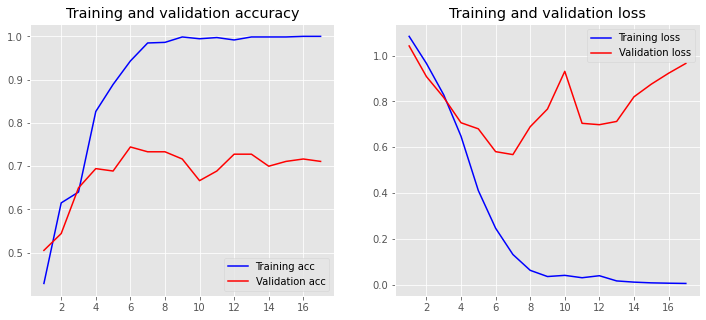

In [166]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [167]:
model_lstm.save('model_lstm.h5')
print("Model has created!")

Model has created!


#7. Data Review Binar

In [169]:
data_review = '/content/scraping_review.csv'

df_review = pd.read_csv(data_review, encoding='latin-1')

In [170]:
df_review

,Unnamed: 0,content
0,0,Unsatisfied apps and program.
1,1,"Beli Binar Go, pembayaran sudah terdebet dari ..."
2,2,Specifically this review is for BinarGO. Overa...
3,3,Yes its good app i like to lern more about dig...
4,4,Can't login
...,...,...
407,407,Awesome! Can't wait for the release of the oth...
408,408,Awesome apps for learning programming tips
409,409,Mangstap kak!!
410,410,saya menghargai usaha teman saya yang buat app...


In [171]:
df_predict = df_review[['content']].copy()
df_predict.head()

,content
0,Unsatisfied apps and program.
1,"Beli Binar Go, pembayaran sudah terdebet dari ..."
2,Specifically this review is for BinarGO. Overa...
3,Yes its good app i like to lern more about dig...
4,Can't login


#8. Persiapan Data Predict

In [172]:
import re 
from keras.models import load_model
import numpy as np
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [176]:
sentiment = ['negative', 'neutral', 'positive']

def get_sent(sent):
    if sent==0:
        sent='negative'
    elif sent==1:
        sent='neutral'
    else: sent='positive'
    return sent

file_tokenizer = open('/content/tokenizer.pickle', 'rb')
file_sequencer = open('/content/x_pad_sequences.pickle', 'rb')
load_tokenizer = pickle.load(file_tokenizer)
load_sequencer = pickle.load(file_sequencer)
file_sequencer.close()
model_lstm = load_model('/content/model_lstm.h5')

#9. Predict LSTM

In [182]:
input_text = """
bad
"""

feature = load_tokenizer.texts_to_sequences(text)
sequences= pad_sequences(feature, maxlen=load_sequencer.shape[1])

prediction = model_lstm.predict(sequences)
get_sentiment = sentiment[np.argmax(prediction[0])]


print("Text : ",text[0])
print("Sentiment: ",get_sentiment)

1/1 [==============================] - 0s 29ms/step
Text :  
bad

Sentiment:  neutral


In [184]:
data_pre = df_predict['content']

data_processed= []
for text in data_pre:
  data_processed.append(text)
    
feature = load_tokenizer.texts_to_sequences(data_processed)
sequences= pad_sequences(feature, maxlen=load_sequencer.shape[1])

prediction = model_lstm.predict(sequences)
get_sentiment = np.argmax(prediction, axis=1)
get_sentiment = get_sentiment.reshape(-1,1)

get= []
for text in get_sentiment:
    sent= get_sent(text)
    get.append(sent)

13/13 [==============================] - 0s 19ms/step


In [186]:
df_predict['Sentiment']= get

In [187]:
df_predict

,content,Sentiment
0,Unsatisfied apps and program.,neutral
1,"Beli Binar Go, pembayaran sudah terdebet dari ...",negative
2,Specifically this review is for BinarGO. Overa...,positive
3,Yes its good app i like to lern more about dig...,neutral
4,Can't login,neutral
...,...,...
407,Awesome! Can't wait for the release of the oth...,neutral
408,Awesome apps for learning programming tips,neutral
409,Mangstap kak!!,neutral
410,saya menghargai usaha teman saya yang buat app...,neutral


## Visualisasi Predict LSTM

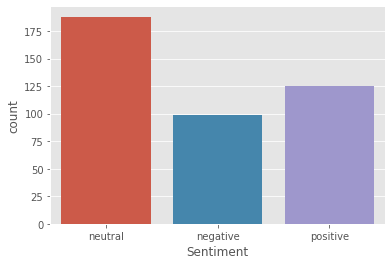

In [188]:
import seaborn as sns
sns.countplot(x='Sentiment', data=df_predict)